In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [4]:
from sklearn import svm

In [5]:
X = np.random.rand(1000, 2)
Y = np.where((X[:, 0]-0.5)**2/9 + (X[:, 1]-0.5)**2/6 < 0.01 + np.random.randn(1000)/400, 1, 0)

In [6]:
svc = svm.SVC(C=10, gamma=1, probability=True)

In [7]:
print(svc.fit(X, Y))
print(svc.score(X, Y))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.955


In [8]:
px, py = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
pxy = np.vstack([px.flatten(), py.flatten()]).T
pz = svc.predict_proba(pxy)[:, 1].reshape(50, 50)

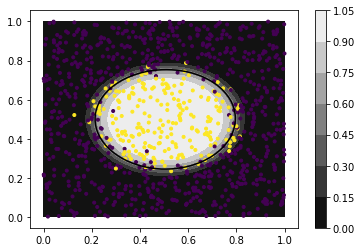

In [97]:
plt.contourf(px, py, pz, cmap=plt.cm.binary_r)
plt.colorbar()
plt.contour(px, py, pz, [0.5], colors='k')
plt.scatter(X[:,0], X[:,1], c=Y, marker='.')